## Barcelona geojson files:

This notebook is just dedicated to reading a plotting the bcn_geodata .geojson files that contain the districts/barris/censal regions of the city of Barca. How I integrate that with the street maps or labels is a separate matter.

This [website](https://docs.astraea.earth/hc/en-us/articles/360043919911-Read-a-GeoJSON-File-into-a-GeoPandas-DataFrame) offers some guidance for reading such files into a geopandas data frame. Let's see if it works.

[Geopandas Reference:](https://geopandas.org/en/stable/index.html)


In [1]:
import geopandas as gpd
import geoplot as gp
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
from IPython.display import display, Image
from shapely.geometry import Point

### Barcelona Geojson Data Sets

The bcn-geodata contains a multitude of geographic data sets in geojson format. The 2020 data was imported from [this github](https://github.com/martgnz/bcn-geodata). 

A range of other data is available on the [Barcelona municipal open data site](https://opendata-ajuntament.barcelona.cat/en/) which seems like an AWESOME resource. This is the [mapping article](https://diegoquintanav.github.io/folium-barcelona-EN.html) that got me turned on to the data. Need to explore more for sure.

I had some difficulty understanding what was inside the .geojson file so I opened it to take a look. The screen shot below gives a sense. Notice the 'NOM' field which has the name of the barri which I wanted. On the other hand it doesn't show in the 

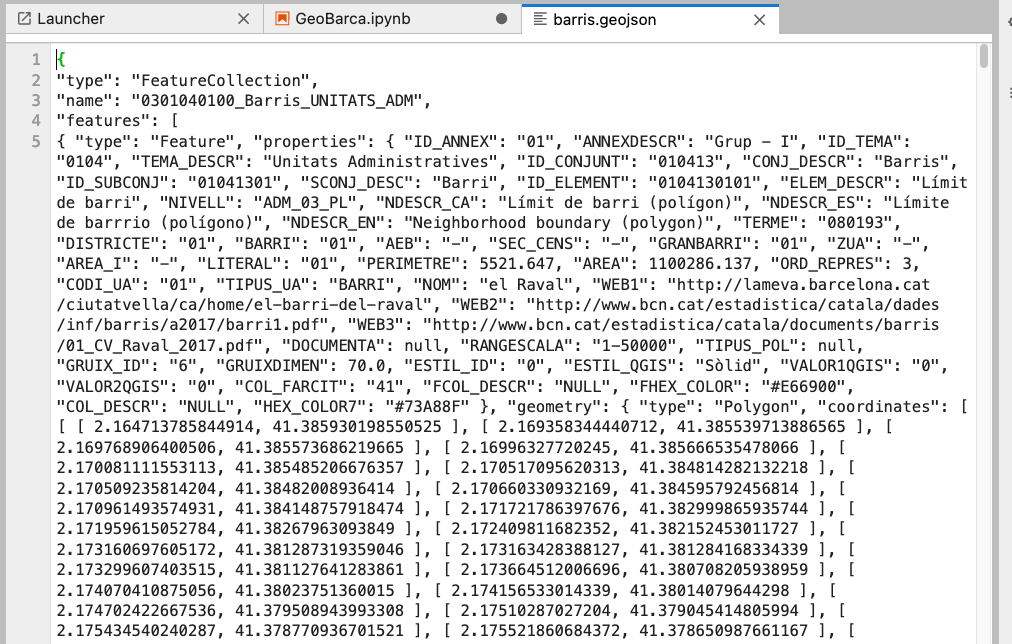

In [3]:
Image('images/barcaGeojsonFormat.png')

Next two cells read some data in from the database and then print out the .crs (coordinate reference systems) for the dataframe and the type of dataframe to be sure everything is on track.

* districtes -- the broad districts
* barris -- the idividual barri
* censal -- these appear to be the census tracts
* terme -- outer boundary of Barca
* estadistica - statistics but by different tracts than any of above
* interes - looks like the airport/port/olimpico part of the city
* urban -- yet another subdivision of the city. Seems like two polygons in each barri?

In [2]:
barcaDFdistrictes = gpd.read_file("bcn-geodata/districtes/districtes.geojson")
barcaDFbarris = gpd.read_file("bcn-geodata/barris/barris.geojson")
barcaDFcensal = gpd.read_file("bcn-geodata/seccio-censal/seccio-censal.geojson")
barcaDFterme = gpd.read_file("bcn-geodata/terme-municipal/terme-municipal.geojson")
barcaDFestadistica = gpd.read_file("bcn-geodata/area-estadistica-basica/area-estadistica-basica.geojson")
barcaDFinteres = gpd.read_file("bcn-geodata/area-interes/area-interes.geojson")
barcaDFurban = gpd.read_file("bcn-geodata/zona-urban-audit/zona-urban-audit.geojson")

### Identify Data Type:

Just a quick check to be sure that I know the data type and reference system for the data. The open data from Barcelona seems to be in the [EPSG:4326](https://epsg.io/4326) system

In [3]:
#print("Districts: \n",(barcaDFdistrictes.crs,type(barcaDFdistrictes)))
#print("\n Barri: \n", (barcaDFbarris.crs,type(barcaDFbarris)))
#print("\n censal: \n", (barcaDFcensal.crs, type(barcaDFcensal)))
#print("\n terme: \n", (barcaDFterme.crs, type(barcaDFterme)))
#print("\n estadistica: \n", (barcaDFestadistica.crs, type(barcaDFestadistica)))
#print("\n interes: \n", (barcaDFinteres.crs, type(barcaDFinteres)))
print("\n urban audit: \n", (barcaDFurban.crs, type(barcaDFurban)))


 urban audit: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, <class 'geopandas.geodataframe.GeoDataFrame'>)


### Display the Dataframe

I often forget whats in these data frames so it's helpful sometimes to roll it out to see what the formatting is. 

In [4]:
barcaDFestadistica.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')

### Display a Column:

Note that the names have characters that won't show if I try to type them in from my keyboard. Makes manual searching a little challenging.

In [6]:
barcaDFbarris["NOM"]

0                            el Raval
1                      el Barri Gòtic
2                      la Barceloneta
3              la Dreta de l'Eixample
4     l'Antiga Esquerra de l'Eixample
                   ...               
68                       les Roquetes
69                   la Trinitat Nova
70                         Torre Baró
71                   Ciutat Meridiana
72                           Vallbona
Name: NOM, Length: 73, dtype: object

### Plot:

Remember that plots are layered according to the order in which they are called.

When plotting the POLYGONS in the data frame colorConverter can be used to create a more transparent facecolor while retaining full density for lines on boundaries.

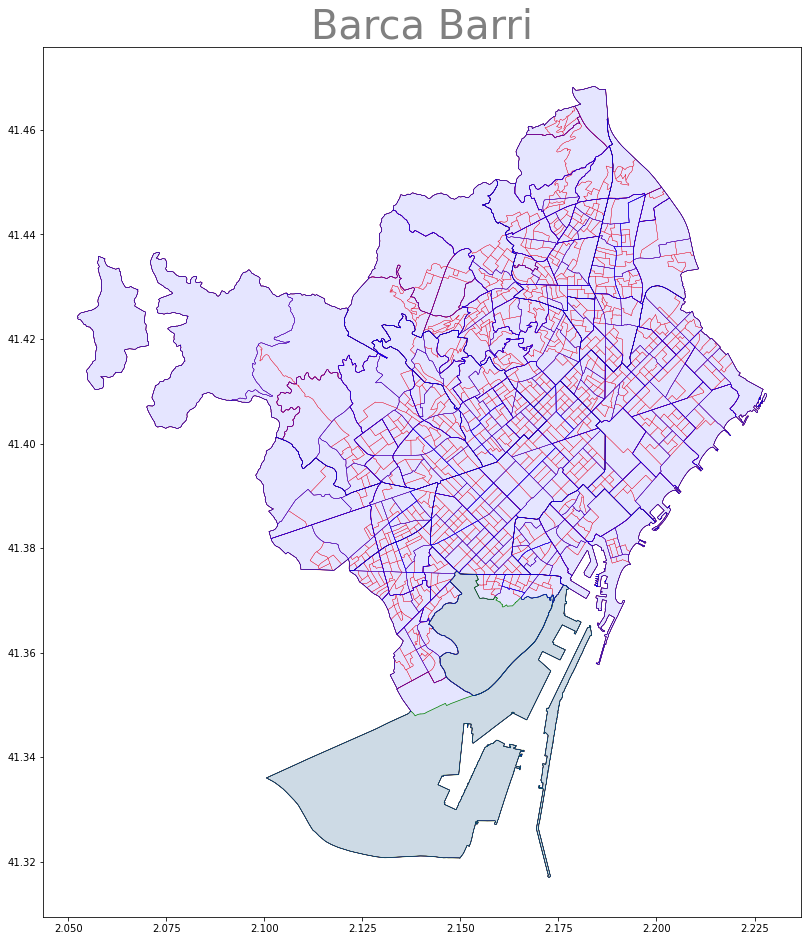

In [21]:
# uncomment to choose which objects to plot

fig, ax = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('blue', alpha=0.1)
fc2 = colorConverter.to_rgba('green', alpha=0.1)

barcaDFcensal.plot(ax=ax, facecolor = 'none', edgecolor = 'red', linewidth=0.3) 
barcaDFbarris.plot(ax=ax,facecolor = fc1, edgecolor='r', linewidth=0.5) 
barcaDFdistrictes.plot(ax=ax, facecolor = 'none',edgecolor='k', linewidth=0.3) 
barcaDFestadistica.plot(ax=ax, facecolor = 'none', edgecolor = 'b', linewidth=0.3) 
barcaDFinteres.plot(ax=ax, facecolor = fc2,edgecolor='g', linewidth=0.7)  
barcaDFurban.plot(ax=ax, facecolor = 'none',edgecolor='b', linewidth=0.3) 


#barcaDFbarris.plot(ax=ax, facecolor = 'whitesmoke', edgecolor='darkgrey', linewidth=0.3) 

plt.title("Barca Barri", fontsize=40, color='grey')
#plt.xlim(2.125, 2.150)
#plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()

### Thoughts:

Labels and centroids to plot them are not included here. Next steps:)